<a href="https://colab.research.google.com/github/soichi-fujiwara/jupyter-notebook/blob/master/Web_scraping_Accidents_plus_temp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install beautifulsoup4
!pip install mecab-python3

     |████████████████████████████████| 15.9MB 1.4MB/s 


In [0]:
import sys
from datetime import *
from time import *

def get_yobi(inDate):
  
  yobi = ["月","火","水","木","金","土","日"]

  a = datetime.strptime(inDate,'%Y/%m/%d')

  #return yobi[a.weekday()]
  return a.weekday()

In [0]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
import pandas as pd
#import MeCab
from google.colab import files

#https://accident.laboneko.jp/accidents?limit=10&offset=0
#https://accident.laboneko.jp/accidents?limit=11680&offset=0

# 親ページURL
url_pr = 'https://accident.laboneko.jp/accidents?limit=11680&offset=0'

# データフレームを定義
columns = ["date","time","yobi","line","from_st","to_st","st"]
df = pd.DataFrame(columns=columns)

html_doc = urlopen(url_pr)

# BeautifulSoupでスクレイピング
soup = BeautifulSoup(html_doc, 'html.parser')
# ラッピング単位のクラスを取得
table  = soup.find_all("table", {"class": "table table-striped"})[0]
rows = table.findAll("tr")

for row in rows:
  dataRow = []
  for cell in row.findAll("td"):
    dataRow.append(cell.text)

  #listに何か入っている場合
  if dataRow:

    v_date = dataRow[0][0:10]
    v_time = dataRow[0][11:16]
    v_yobi = get_yobi(v_date)

    v_line = dataRow[1]

    v_st_info = dataRow[2]
    v_st_info_sp = v_st_info.split("〜")

    if len(v_st_info_sp) >= 2:
      v_from_st = v_st_info_sp[0]
      v_to_st = v_st_info_sp[1]
      v_st = v_st_info_sp[0]
    else:
      v_from_st = v_st_info
      v_to_st = v_st_info
      v_st = v_st_info

    # 各データをデータフレームに格納
    se = pd.Series([v_date,v_time,v_yobi,v_line,v_from_st,v_to_st,v_st], columns)
    df = df.append(se, columns)

# 収集したデータをCSV形式で保存
filename = "Accident_list.csv"
df.to_csv(filename, encoding = 'utf-8',index=False)
#files.download(filename)


##ファイルがあればここから実行

In [1]:
import pandas as pd

df_ac = pd.read_csv("Accident_list.csv")

#鉄道会社の人身事故発生順にソート
df_line = df_ac["line"].value_counts().reset_index()

#SeriseをDataFrameに変換
col_name = ["line","count"]
df_line = pd.DataFrame(df_line)

df_line.columns = col_name
df_line.head()

,line,count
0,東武東上線,291
1,山陽本線_(JR西日本),263
2,京浜東北線,245
3,東海道線_(JR東海),244
4,中央快速線,244


In [0]:
#件数は削除
df_line = df_line.drop("count",axis=1)
df_line

#CSVに出力
df_line.to_csv("line_List_Candidate.csv", encoding = 'utf-8',index=False,header=False)

In [3]:
import itertools

kanto_line = pd.read_table('kanto_line.txt', header=None)

#dataframeをlist化
kanto_line_list = kanto_line.values.tolist()
#2次元listから1次元listへ
kanto_line_list = list(itertools.chain.from_iterable(kanto_line_list))

print(kanto_line_list)

['東武東上線', '京浜東北線', '中央快速線', '常磐線', '小田急小田原線', '西武新宿線', '宇都宮線', '京王線', '京急本線', '西武池袋線', '東武伊勢崎線', '東海道線_(JR東日本)', '高崎線', '中央・総武緩行線', '東急田園都市線', '山手線', '東北本線', '近鉄大阪線', '京成本線', '横浜線', '横須賀線', '総武快速線', '南武線', '埼京線', '相鉄本線', '東武野田線', '東急東横線', '外房線', '新京成電鉄新京成線', '中央本線_(JR東日本)', '小田急江ノ島線', '武蔵野線', '総武本線', '都電荒川線', '東京メトロ東西線', '青梅線', '関東鉄道常総線', '成田線', '根岸線', '京王井の頭線', '都営地下鉄新宿線', '京葉線', '秩父鉄道秩父本線', '東急大井町線', '東京メトロ千代田線', '八高線', '東急池上線', '京王相模原線', '川越線', '東京メトロ日比谷線', '西武拝島線', '京成押上線', '相模線', '都営地下鉄浅草線', '江ノ島電鉄線', '東武スカイツリーライン', '東京メトロ半蔵門線', '東武アーバンパークライン', '都営地下鉄大江戸線', '東葉高速鉄道東葉高速線', '東京メトロ銀座線', '小田急多摩線', '横浜高速鉄道みなとみらい線', 'JR東西線', '首都圏新都市鉄道つくばエクスプレス', '京急空港線', '相鉄いずみ野線', '東京メトロ有楽町線', '東京臨海高速鉄道りんかい線', '鶴見線', '東京モノレール羽田空港線', '東武亀戸線', '京葉臨海鉄道臨海本線', '京王新線', '西武秩父線', '埼玉高速鉄道線', '横浜市営地下鉄ブルーライン']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
#関東(首都圏)に影響を与えそうな路線のデータのみ抽出
new_data = df_ac[df_ac['line'].isin(kanto_line_list)]
new_data = new_data.reset_index()

#不要な項目を削除
new_data = new_data.drop("index",axis=1)

new_data.head(5)

,date,time,yobi,line,from_st,to_st,st
0,2019/08/10,20:08,5,八高線,拝島駅,東福生駅,拝島駅
1,2019/08/09,22:39,4,東急東横線,学芸大学駅,学芸大学駅,学芸大学駅
2,2019/08/07,18:00,2,宇都宮線,東大宮駅,蓮田駅,東大宮駅
3,2019/08/06,11:54,1,総武本線,八街駅,日向駅,八街駅
4,2019/08/05,12:18,0,東急大井町線,自由が丘駅,九品仏駅,自由が丘駅


In [0]:
!pip install pandas-profiling

In [0]:
import pandas_profiling as pdp
from IPython.display import HTML

profile = pdp.ProfileReport(new_data)
profile.to_file(outputfile="myOutputFile_line.html")

#html化して表示
HTML(filename='myOutputFile_line.html')

# **profilingの考察**
・曜日は関係無さそう

・分析する上で情報が不足している

・正規化、細分化できる情報は無いか

In [5]:
# データフレームを定義
#通勤時間帯/帰宅時間帯/日中/それ以外で分けてみよう

#コピーを付けないとコピー元も変更されてしまう
new_df = new_data.copy()

#カラム「time」をコピーして追加
#(後でカテゴリ分けしたい為)
new_df = new_df.assign(time_category=new_df['time'])
new_df = new_df.assign(season=new_df['date'])

#-------------------------------------------------------------------------------------------
#時間帯
#-------------------------------------------------------------------------------------------
#数値型で比較したい場合は「.str[0:2].astype(int)」を使用する
new_df.loc[(new_df['time_category'].str[0:2].isin(["04","05"])) ,"time_category"] = "morning_time"
new_df.loc[(new_df['time_category'].str[0:2].isin(["06","07","08","09"])) ,"time_category"] = "comp_time"
new_df.loc[(new_df['time_category'].str[0:2].isin(["17","18","19","20","21"])) ,"time_category"] = "home_time"
new_df.loc[(new_df['time_category'].str[0:2].isin(["22","23","00","01"])) ,"time_category"] = "night_time"
new_df.loc[(new_df['time_category'].str[0:2].isin(["02","03","10","11","12","13","14","15","16"])) ,"time_category"] = "etc_time"

dmy_df = pd.get_dummies(new_df['time_category'])
add_df = pd.merge(new_df, dmy_df, left_index=True, right_index=True)
add_df = add_df.drop("time_category",axis=1)

#-------------------------------------------------------------------------------------------
#気候
#-------------------------------------------------------------------------------------------
add_df.loc[(add_df['season'].str[5:7].isin(["04","05","10","11"])) ,"season"] = "warm"
add_df.loc[(add_df['season'].str[5:7].isin(["06","07","08","09"])) ,"season"] = "hot"
add_df.loc[(add_df['season'].str[5:7].isin(["12","01","02","03"])) ,"season"] = "cold"

dmy_df = pd.get_dummies(add_df['season'])
add_df = pd.merge(add_df, dmy_df, left_index=True, right_index=True)
add_df = add_df.drop("season",axis=1)

#-------------------------------------------------------------------------------------------
#曜日
#-------------------------------------------------------------------------------------------
dmy_df = pd.get_dummies(add_df['yobi'],prefix='yobi')
add_df = pd.merge(add_df, dmy_df, left_index=True, right_index=True)
add_df = add_df.drop("yobi",axis=1)

add_df.head(5)

,date,time,line,from_st,to_st,st,comp_time,etc_time,home_time,morning_time,night_time,cold,hot,warm,yobi_0,yobi_1,yobi_2,yobi_3,yobi_4,yobi_5,yobi_6
0,2019/08/10,20:08,八高線,拝島駅,東福生駅,拝島駅,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,2019/08/09,22:39,東急東横線,学芸大学駅,学芸大学駅,学芸大学駅,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
2,2019/08/07,18:00,宇都宮線,東大宮駅,蓮田駅,東大宮駅,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
3,2019/08/06,11:54,総武本線,八街駅,日向駅,八街駅,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
4,2019/08/05,12:18,東急大井町線,自由が丘駅,九品仏駅,自由が丘駅,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0


In [19]:
#補完したい期間の日付を入れたデータフレームを作ってマージ
#https://qiita.com/hanon/items/29cf5ed9acb4f731538f

#キー結合させる為
add_df["date"] = add_df['date'].astype('str')

#気温
temp_df = pd.read_csv("temp.csv")
temp_df = temp_df.drop("yobi", axis=1)

df_2 = pd.merge(add_df,temp_df, on='date' , how='left')#left join

#日照時間
sun_df = pd.read_csv("suntime.csv")
df_2 = pd.merge(df_2,sun_df, on='date' , how='left')#left join

df_2.head()

,date,time,line,from_st,to_st,st,comp_time,etc_time,home_time,morning_time,night_time,cold,hot,warm,yobi_0,yobi_1,yobi_2,yobi_3,yobi_4,yobi_5,yobi_6,max_temp,min_temp,suntime
0,2019/08/10,20:08,八高線,拝島駅,東福生駅,拝島駅,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,34.4,25.7,9.4
1,2019/08/09,22:39,東急東横線,学芸大学駅,学芸大学駅,学芸大学駅,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,35.6,26.2,10.8
2,2019/08/07,18:00,宇都宮線,東大宮駅,蓮田駅,東大宮駅,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,35.6,26.7,9.5
3,2019/08/06,11:54,総武本線,八街駅,日向駅,八街駅,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,35.0,27.5,10.5
4,2019/08/05,12:18,東急大井町線,自由が丘駅,九品仏駅,自由が丘駅,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,34.9,25.1,11.1


##季節ごとの平均気温を算出

In [20]:
#日付単位で最高気温を集計
#()･･･集計単位項目
#[]･･･集計対象項目
import numpy as np

#listからnumpy.darray型にしないとnumpyの集計関数が使用できない
temp_mean_ary = []
month_list = ["01","02","03","04","05","06","07","08","09","10","11","12"]

for m_val in month_list:
  max_temp = np.array(temp_df[temp_df.date.str[5:7] == m_val]["max_temp"]).mean()
  min_temp = np.array(temp_df[temp_df.date.str[5:7] == m_val]["min_temp"]).mean()

  list_parts = np.concatenate((m_val,max_temp,min_temp), axis=None)
  temp_mean_ary.append(list_parts.tolist())

col=["date","max_temp","min_temp"]
temp_mean_df = pd.DataFrame(data=temp_mean_ary,columns=col)
temp_mean_df

,date,max_temp,min_temp
0,01,10.303225806451612,1.466451612903226
1,02,11.273758865248226,2.4468085106382977
2,03,15.217419354838709,5.739354838709677
3,04,20.102666666666664,10.635333333333332
4,05,25.320645161290322,15.788387096774192
5,06,26.308666666666667,18.766666666666666
6,07,30.37161290322581,23.15483870967742
7,08,31.568148148148154,24.119259259259263
8,09,26.896666666666665,20.27166666666667
9,10,22.087096774193547,15.026612903225807


##季節ごとの日照時間を算出

In [24]:
#日付単位で日照時間を集計
#()･･･集計単位項目
#[]･･･集計対象項目
import numpy as np

#欠損値削除
sun_df = sun_df.dropna()

#listからnumpy.darray型にしないとnumpyの集計関数が使用できない
sun_mean_ary = []
month_list = ["01","02","03","04","05","06","07","08","09","10","11","12"]

for m_val in month_list:
  sun_mean = np.array(sun_df[sun_df.date.str[5:7] == m_val]["suntime"]).mean()

  list_parts = np.concatenate((m_val,sun_mean), axis=None)
  sun_mean_ary.append(list_parts.tolist())

col=["date","suntime"]
sun_mean_df = pd.DataFrame(data=sun_mean_ary,columns=col)
sun_mean_df

,date,suntime
0,01,6.786774193548386
1,02,5.540714285714286
2,03,5.874516129032258
3,04,6.047666666666667
4,05,6.768506493506495
5,06,4.625333333333333
6,07,5.521824104234528
7,08,5.953103448275862
8,09,4.515925925925925
9,10,4.155913978494624


##欠測値を補完

In [0]:
#最高気温
df_2.loc[(df_2["max_temp"].isnull()) & (df_2['date'].str[5:7].isin(["01"])),"max_temp"] = temp_mean_df.loc[0,"max_temp"]
df_2.loc[(df_2["max_temp"].isnull()) & (df_2['date'].str[5:7].isin(["02"])),"max_temp"] = temp_mean_df.loc[1,"max_temp"]
df_2.loc[(df_2["max_temp"].isnull()) & (df_2['date'].str[5:7].isin(["03"])),"max_temp"] = temp_mean_df.loc[2,"max_temp"]
df_2.loc[(df_2["max_temp"].isnull()) & (df_2['date'].str[5:7].isin(["04"])),"max_temp"] = temp_mean_df.loc[3,"max_temp"]
df_2.loc[(df_2["max_temp"].isnull()) & (df_2['date'].str[5:7].isin(["05"])),"max_temp"] = temp_mean_df.loc[4,"max_temp"]
df_2.loc[(df_2["max_temp"].isnull()) & (df_2['date'].str[5:7].isin(["06"])),"max_temp"] = temp_mean_df.loc[5,"max_temp"]
df_2.loc[(df_2["max_temp"].isnull()) & (df_2['date'].str[5:7].isin(["07"])),"max_temp"] = temp_mean_df.loc[6,"max_temp"]
df_2.loc[(df_2["max_temp"].isnull()) & (df_2['date'].str[5:7].isin(["08"])),"max_temp"] = temp_mean_df.loc[7,"max_temp"]
df_2.loc[(df_2["max_temp"].isnull()) & (df_2['date'].str[5:7].isin(["09"])),"max_temp"] = temp_mean_df.loc[8,"max_temp"]
df_2.loc[(df_2["max_temp"].isnull()) & (df_2['date'].str[5:7].isin(["10"])),"max_temp"] = temp_mean_df.loc[9,"max_temp"]
df_2.loc[(df_2["max_temp"].isnull()) & (df_2['date'].str[5:7].isin(["11"])),"max_temp"] = temp_mean_df.loc[10,"max_temp"]
df_2.loc[(df_2["max_temp"].isnull()) & (df_2['date'].str[5:7].isin(["12"])),"max_temp"] = temp_mean_df.loc[11,"max_temp"]

#最低気温
df_2.loc[(df_2["min_temp"].isnull()) & (df_2['date'].str[5:7].isin(["01"])),"min_temp"] = temp_mean_df.loc[0,"min_temp"]
df_2.loc[(df_2["min_temp"].isnull()) & (df_2['date'].str[5:7].isin(["02"])),"min_temp"] = temp_mean_df.loc[1,"min_temp"]
df_2.loc[(df_2["min_temp"].isnull()) & (df_2['date'].str[5:7].isin(["03"])),"min_temp"] = temp_mean_df.loc[2,"min_temp"]
df_2.loc[(df_2["min_temp"].isnull()) & (df_2['date'].str[5:7].isin(["04"])),"min_temp"] = temp_mean_df.loc[3,"min_temp"]
df_2.loc[(df_2["min_temp"].isnull()) & (df_2['date'].str[5:7].isin(["05"])),"min_temp"] = temp_mean_df.loc[4,"min_temp"]
df_2.loc[(df_2["min_temp"].isnull()) & (df_2['date'].str[5:7].isin(["06"])),"min_temp"] = temp_mean_df.loc[5,"min_temp"]
df_2.loc[(df_2["min_temp"].isnull()) & (df_2['date'].str[5:7].isin(["07"])),"min_temp"] = temp_mean_df.loc[6,"min_temp"]
df_2.loc[(df_2["min_temp"].isnull()) & (df_2['date'].str[5:7].isin(["08"])),"min_temp"] = temp_mean_df.loc[7,"min_temp"]
df_2.loc[(df_2["min_temp"].isnull()) & (df_2['date'].str[5:7].isin(["09"])),"min_temp"] = temp_mean_df.loc[8,"min_temp"]
df_2.loc[(df_2["min_temp"].isnull()) & (df_2['date'].str[5:7].isin(["10"])),"min_temp"] = temp_mean_df.loc[9,"min_temp"]
df_2.loc[(df_2["min_temp"].isnull()) & (df_2['date'].str[5:7].isin(["11"])),"min_temp"] = temp_mean_df.loc[10,"min_temp"]
df_2.loc[(df_2["min_temp"].isnull()) & (df_2['date'].str[5:7].isin(["12"])),"min_temp"] = temp_mean_df.loc[11,"min_temp"]

#日照時間
df_2.loc[(df_2["suntime"].isnull()) & (df_2['date'].str[5:7].isin(["01"])),"suntime"] = sun_mean_df.loc[0,"suntime"]
df_2.loc[(df_2["suntime"].isnull()) & (df_2['date'].str[5:7].isin(["02"])),"suntime"] = sun_mean_df.loc[1,"suntime"]
df_2.loc[(df_2["suntime"].isnull()) & (df_2['date'].str[5:7].isin(["03"])),"suntime"] = sun_mean_df.loc[2,"suntime"]
df_2.loc[(df_2["suntime"].isnull()) & (df_2['date'].str[5:7].isin(["04"])),"suntime"] = sun_mean_df.loc[3,"suntime"]
df_2.loc[(df_2["suntime"].isnull()) & (df_2['date'].str[5:7].isin(["05"])),"suntime"] = sun_mean_df.loc[4,"suntime"]
df_2.loc[(df_2["suntime"].isnull()) & (df_2['date'].str[5:7].isin(["06"])),"suntime"] = sun_mean_df.loc[5,"suntime"]
df_2.loc[(df_2["suntime"].isnull()) & (df_2['date'].str[5:7].isin(["07"])),"suntime"] = sun_mean_df.loc[6,"suntime"]
df_2.loc[(df_2["suntime"].isnull()) & (df_2['date'].str[5:7].isin(["08"])),"suntime"] = sun_mean_df.loc[7,"suntime"]
df_2.loc[(df_2["suntime"].isnull()) & (df_2['date'].str[5:7].isin(["09"])),"suntime"] = sun_mean_df.loc[8,"suntime"]
df_2.loc[(df_2["suntime"].isnull()) & (df_2['date'].str[5:7].isin(["10"])),"suntime"] = sun_mean_df.loc[9,"suntime"]
df_2.loc[(df_2["suntime"].isnull()) & (df_2['date'].str[5:7].isin(["11"])),"suntime"] = sun_mean_df.loc[10,"suntime"]
df_2.loc[(df_2["suntime"].isnull()) & (df_2['date'].str[5:7].isin(["12"])),"suntime"] = sun_mean_df.loc[11,"suntime"]

In [26]:
df_base = df_2.copy().drop(["date","st","time","line","from_st","to_st","from_st"], axis=1)
df_base = df_base.assign(flg=1)

df_base.head()

,comp_time,etc_time,home_time,morning_time,night_time,cold,hot,warm,yobi_0,yobi_1,yobi_2,yobi_3,yobi_4,yobi_5,yobi_6,max_temp,min_temp,suntime,flg
0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,34.4,25.7,9.4,1
1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,35.6,26.2,10.8,1
2,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,35.6,26.7,9.5,1
3,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,35,27.5,10.5,1
4,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,34.9,25.1,11.1,1


In [28]:
import numpy as np
from datetime import date, timedelta

#日付データ作成
dates_df = pd.DataFrame({"date": [pd.to_datetime("2010-01-01") + timedelta(days=i) for i in range(3650)]},dtype="object")
dt_ary = dates_df.values.tolist()

#デフォルトでは小数点が付いてしまう為、int型に変換
time_cate = np.eye(5).astype(int)
yobi_cate = np.eye(7).astype(int)
season_cate = ['0','0','0']

wk_list = []
for wk in dt_ary:
  for wk2 in time_cate:
    for wk3 in yobi_cate:
      list_parts = np.concatenate((wk,wk2,season_cate,wk3), axis=None)
      wk_list.append(list_parts.tolist())

col=["date",
     "comp_time","etc_time","home_time","morning_time","night_time",
     "cold","hot","warm",
     "yobi_0","yobi_1","yobi_2","yobi_3","yobi_4","yobi_5","yobi_6"]

df = pd.DataFrame(data=wk_list,columns=col)

#文字列操作をする為、日付型から文字列型へ
df['date'] = df['date'].astype('str')
df['date'] = df['date'].str.replace('-', '/')

#-------------------------------------------------------------------------------------------
#気候
#-------------------------------------------------------------------------------------------
df.loc[(df['date'].str[5:7].isin(["04","05","10","11"])) ,"warm"] = "1"
df.loc[(df['date'].str[5:7].isin(["06","07","08","09"])) ,"hot"] = "1"
df.loc[(df['date'].str[5:7].isin(["12","01","02","03"])) ,"cold"] = "1"

temp_df = pd.read_csv("temp.csv")
temp_df = temp_df.drop("yobi", axis=1)

df = pd.merge(df,temp_df, on='date' , how='left')#left join
df = pd.merge(df,sun_df, on='date' , how='left')#left join

#-------------------------------------------------------------------------------------------
#気温欠測値 補完
#-------------------------------------------------------------------------------------------
#最高気温
df.loc[(df["max_temp"].isnull()) & (df['date'].str[5:7].isin(["01"])),"max_temp"] = temp_mean_df.loc[0,"max_temp"]
df.loc[(df["max_temp"].isnull()) & (df['date'].str[5:7].isin(["02"])),"max_temp"] = temp_mean_df.loc[1,"max_temp"]
df.loc[(df["max_temp"].isnull()) & (df['date'].str[5:7].isin(["03"])),"max_temp"] = temp_mean_df.loc[2,"max_temp"]
df.loc[(df["max_temp"].isnull()) & (df['date'].str[5:7].isin(["04"])),"max_temp"] = temp_mean_df.loc[3,"max_temp"]
df.loc[(df["max_temp"].isnull()) & (df['date'].str[5:7].isin(["05"])),"max_temp"] = temp_mean_df.loc[4,"max_temp"]
df.loc[(df["max_temp"].isnull()) & (df['date'].str[5:7].isin(["06"])),"max_temp"] = temp_mean_df.loc[5,"max_temp"]
df.loc[(df["max_temp"].isnull()) & (df['date'].str[5:7].isin(["07"])),"max_temp"] = temp_mean_df.loc[6,"max_temp"]
df.loc[(df["max_temp"].isnull()) & (df['date'].str[5:7].isin(["08"])),"max_temp"] = temp_mean_df.loc[7,"max_temp"]
df.loc[(df["max_temp"].isnull()) & (df['date'].str[5:7].isin(["09"])),"max_temp"] = temp_mean_df.loc[8,"max_temp"]
df.loc[(df["max_temp"].isnull()) & (df['date'].str[5:7].isin(["10"])),"max_temp"] = temp_mean_df.loc[9,"max_temp"]
df.loc[(df["max_temp"].isnull()) & (df['date'].str[5:7].isin(["11"])),"max_temp"] = temp_mean_df.loc[10,"max_temp"]
df.loc[(df["max_temp"].isnull()) & (df['date'].str[5:7].isin(["12"])),"max_temp"] = temp_mean_df.loc[11,"max_temp"]

#最低気温
df.loc[(df["min_temp"].isnull()) & (df['date'].str[5:7].isin(["01"])),"min_temp"] = temp_mean_df.loc[0,"min_temp"]
df.loc[(df["min_temp"].isnull()) & (df['date'].str[5:7].isin(["02"])),"min_temp"] = temp_mean_df.loc[1,"min_temp"]
df.loc[(df["min_temp"].isnull()) & (df['date'].str[5:7].isin(["03"])),"min_temp"] = temp_mean_df.loc[2,"min_temp"]
df.loc[(df["min_temp"].isnull()) & (df['date'].str[5:7].isin(["04"])),"min_temp"] = temp_mean_df.loc[3,"min_temp"]
df.loc[(df["min_temp"].isnull()) & (df['date'].str[5:7].isin(["05"])),"min_temp"] = temp_mean_df.loc[4,"min_temp"]
df.loc[(df["min_temp"].isnull()) & (df['date'].str[5:7].isin(["06"])),"min_temp"] = temp_mean_df.loc[5,"min_temp"]
df.loc[(df["min_temp"].isnull()) & (df['date'].str[5:7].isin(["07"])),"min_temp"] = temp_mean_df.loc[6,"min_temp"]
df.loc[(df["min_temp"].isnull()) & (df['date'].str[5:7].isin(["08"])),"min_temp"] = temp_mean_df.loc[7,"min_temp"]
df.loc[(df["min_temp"].isnull()) & (df['date'].str[5:7].isin(["09"])),"min_temp"] = temp_mean_df.loc[8,"min_temp"]
df.loc[(df["min_temp"].isnull()) & (df['date'].str[5:7].isin(["10"])),"min_temp"] = temp_mean_df.loc[9,"min_temp"]
df.loc[(df["min_temp"].isnull()) & (df['date'].str[5:7].isin(["11"])),"min_temp"] = temp_mean_df.loc[10,"min_temp"]
df.loc[(df["min_temp"].isnull()) & (df['date'].str[5:7].isin(["12"])),"min_temp"] = temp_mean_df.loc[11,"min_temp"]

#日照時間
df.loc[(df["suntime"].isnull()) & (df['date'].str[5:7].isin(["01"])),"suntime"] = sun_mean_df.loc[0,"suntime"]
df.loc[(df["suntime"].isnull()) & (df['date'].str[5:7].isin(["02"])),"suntime"] = sun_mean_df.loc[1,"suntime"]
df.loc[(df["suntime"].isnull()) & (df['date'].str[5:7].isin(["03"])),"suntime"] = sun_mean_df.loc[2,"suntime"]
df.loc[(df["suntime"].isnull()) & (df['date'].str[5:7].isin(["04"])),"suntime"] = sun_mean_df.loc[3,"suntime"]
df.loc[(df["suntime"].isnull()) & (df['date'].str[5:7].isin(["05"])),"suntime"] = sun_mean_df.loc[4,"suntime"]
df.loc[(df["suntime"].isnull()) & (df['date'].str[5:7].isin(["06"])),"suntime"] = sun_mean_df.loc[5,"suntime"]
df.loc[(df["suntime"].isnull()) & (df['date'].str[5:7].isin(["07"])),"suntime"] = sun_mean_df.loc[6,"suntime"]
df.loc[(df["suntime"].isnull()) & (df['date'].str[5:7].isin(["08"])),"suntime"] = sun_mean_df.loc[7,"suntime"]
df.loc[(df["suntime"].isnull()) & (df['date'].str[5:7].isin(["09"])),"suntime"] = sun_mean_df.loc[8,"suntime"]
df.loc[(df["suntime"].isnull()) & (df['date'].str[5:7].isin(["10"])),"suntime"] = sun_mean_df.loc[9,"suntime"]
df.loc[(df["suntime"].isnull()) & (df['date'].str[5:7].isin(["11"])),"suntime"] = sun_mean_df.loc[10,"suntime"]
df.loc[(df["suntime"].isnull()) & (df['date'].str[5:7].isin(["12"])),"suntime"] = sun_mean_df.loc[11,"suntime"]

df_add = df.drop("date", axis=1)
df_add = df_add.assign(flg=0)
df_add.head()

,comp_time,etc_time,home_time,morning_time,night_time,cold,hot,warm,yobi_0,yobi_1,yobi_2,yobi_3,yobi_4,yobi_5,yobi_6,max_temp,min_temp,suntime,flg
0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,10.303225806451612,1.466451612903226,9.2,0
1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,10.303225806451612,1.466451612903226,9.2,0
2,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,10.303225806451612,1.466451612903226,9.2,0
3,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,10.303225806451612,1.466451612903226,9.2,0
4,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,10.303225806451612,1.466451612903226,9.2,0


In [31]:
# NegativeデータとPositiveデータを統合
ret = pd.concat([df_base, df_add], axis=0)
#duplicated()と論理否定演算子~を使って、重複した行を削除したDataFrameを取得できる。
ret = ret[~ret.duplicated()]

#中央値で埋める
# ret = ret.fillna(ret.median())
# ret = ret.reset_index()
# ret = ret.drop("index", axis=1)

#可視化の為
ret['max_temp'] = ret['max_temp'].astype('float')
ret['min_temp'] = ret['min_temp'].astype('float')
ret['suntime'] = ret['suntime'].astype('float')
ret['cold'] = ret['cold'].astype('int')
ret['warm'] = ret['warm'].astype('int')
ret['hot'] = ret['hot'].astype('int')

ret.head()

,comp_time,etc_time,home_time,morning_time,night_time,cold,hot,warm,yobi_0,yobi_1,yobi_2,yobi_3,yobi_4,yobi_5,yobi_6,max_temp,min_temp,suntime,flg
0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,34.4,25.7,9.4,1
1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,35.6,26.2,10.8,1
2,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,35.6,26.7,9.5,1
3,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,35.0,27.5,10.5,1
4,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,34.9,25.1,11.1,1


In [0]:
#正規化
ret_ = ret.copy()
s = ret_['max_temp']
ret_['max_temp'] = (s - s.min()) / (s.max() - s.min())

s = ret_['min_temp']
ret_['min_temp'] = (s - s.min()) / (s.max() - s.min())

s = ret_['suntime']
ret_['suntime'] = (s - s.min()) / (s.max() - s.min())

ret = ret_.copy()

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC,LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# ラベルと入力データに分離する
y = ret.loc[:,"flg"]
y = y.values.tolist()

x = ret.loc[:,["comp_time","etc_time","home_time","morning_time","night_time","cold","hot","warm","yobi_0","yobi_1","yobi_2","yobi_3","yobi_4","yobi_5","yobi_6","max_temp","min_temp","suntime"]]

# 学習用とテスト用に分離する
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, train_size = 0.8, shuffle = True)

# #グリッドサーチ
# best_score = 0
# for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
#     for C in [0.001, 0.01, 0.1, 1, 10, 100]:
#         #それぞれのパラメータの組み合わせに足してSVCを訓練
#         svm = SVC(gamma=gamma, C=C)
#         svm.fit(x_train, y_train)
#         #SVCをテストセットで評価
#         score = svm.score(x_test, y_test)
#         #良いスコアであればスコアとパラメータを保持
#         if score > best_score:
#             best_score = score
#             best_parameters = {'C':C, 'gamma':gamma}
# print("Best score: {:.2f}".format(best_score))
# print("Best parameters: {}".format(best_parameters))

In [34]:
# 学習する
# model = SVC(C=0.001,gamma=0.001)
model = DecisionTreeClassifier ()

model.fit(x_train, y_train)

# 評価する
y_pred = model.predict(x_test)
print("正解率 = " , accuracy_score(y_test, y_pred))

正解率 =  0.9136184728417738


In [35]:
#PositiveデータとNegativeデータの割合
print(ret["flg"].value_counts())

0    91140
1     4133
Name: flg, dtype: int64


In [36]:
#真陽性率 (Recall)
#Positive なデータに対してモデルがどれだけ正解できているかを確認
from sklearn.metrics import recall_score
print("真陽性率 = ",recall_score(y_test, y_pred))

真陽性率 =  0.0034403669724770644


###ほとんどのデータを Negative と判断していることになる･･･。

In [37]:
#適合率 (Precision) 
#モデルが Positive と判断したデータの中に、どれだけ本当に Positive なものがあったかを確認
from sklearn.metrics import precision_score
print("適合率 = ",precision_score(y_test, y_pred))

適合率 =  0.0038461538461538464


In [38]:
#ダウンサンプリング
!pip install imbalanced-learn

In [39]:
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_predict

sampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = sampler.fit_resample(x, y)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [40]:
import warnings
from sklearn.utils.testing import all_estimators
from sklearn.metrics import accuracy_score

# classifierのアルゴリズム全てを取得する --- (*1)
warnings.filterwarnings('ignore')
allAlgorithms = all_estimators(type_filter="classifier")

for(name, algorithm) in allAlgorithms:

    #エラー回避
    if name == 'GradientBoostingClassifier' or name == 'RandomForestClassifier' or name == 'DecisionTreeClassifier' or name == 'KNeighborsClassifier' or name == 'LogisticRegression' or name == 'LogisticRegressionCV':

      # 各アリゴリズムのオブジェクトを作成 --- (*2)
      # 注意:一部のアルゴリズムは引数に何かを渡さないとエラーになる。
      clf = algorithm()

      # 学習して、評価する --- (*3)
      #( x_train : 学習用データ / learn_label : ラベル)
      clf.fit(X_resampled, y_resampled)
      y_pred = clf.predict(x_test)
      print(name,"の正解率 = " , accuracy_score(y_test, y_pred))

DecisionTreeClassifier の正解率 =  0.5728155339805825
GradientBoostingClassifier の正解率 =  0.5433744424035686
KNeighborsClassifier の正解率 =  0.533718184203621
LogisticRegression の正解率 =  0.5288375754395171
LogisticRegressionCV の正解率 =  0.5680398845447389
RandomForestClassifier の正解率 =  0.6088165835738651


In [41]:
#正解率が高いアルゴリズムを採用
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

#可視化する為にはfitする必要がある。
clf = clf.fit(X_resampled, y_resampled)

y_sampled_pred = cross_val_predict(clf, X_resampled, y_resampled, cv=5)

print("正解率 = ",accuracy_score(y_resampled, y_sampled_pred))
print("真陽性率 = ",recall_score(y_resampled, y_sampled_pred))
print("適合率 = ",precision_score(y_resampled, y_sampled_pred))

正解率 =  0.5197193322042101
真陽性率 =  0.432615533510767
適合率 =  0.5238792850864342


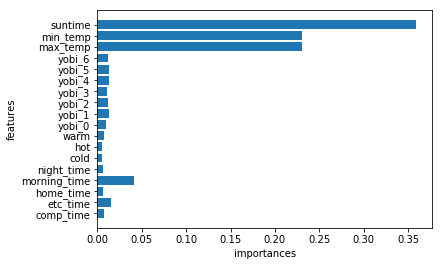

In [42]:
#各特徴量の重要度を可視化
import matplotlib.pyplot as plt
% matplotlib inline
import numpy as np
 
def plot_feature_importances(model):
  n_features = X_resampled.data.shape[1] # 全説明変数
  plt.barh(range(n_features), model.feature_importances_, align='center') # 描画する際の枠組みを設定
  plt.yticks(np.arange(n_features), x.columns) # 縦軸の設定
  plt.xlabel('importances') # 横軸の設定
  plt.ylabel('features') # 縦軸の設定
  plt.show()

#実行
plot_feature_importances(clf)
 

In [43]:
#精度の追求
#アンサンブル学習(Voting )
# voting に使う分類器を用意する
from collections import defaultdict

import numpy as np
from tqdm import tqdm
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB

def main():
  X = X_resampled
  y = y_resampled

  estimators = [
    ('svm', SVC(gamma='scale', probability=True)),
    ('tree', DecisionTreeClassifier()),
    ('rf', RandomForestClassifier(n_estimators=100)),
    ('logit', LogisticRegression(solver='lbfgs', max_iter=10000)),
    ('knn', KNeighborsClassifier()),
    ('nb', GaussianNB()),
  ]

  accs = defaultdict(list)
  skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

  for train_index, test_index in tqdm(list(skf.split(X, y))):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # 分類器に重みをつける
    voting = VotingClassifier(estimators,weights=[1,1,3,1,1,1])
    voting.fit(X_train, y_train)

    y_pred = voting.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accs['voting'].append(acc)

    for name, estimator in voting.named_estimators_.items():
      y_pred = estimator.predict(X_test)
      acc = accuracy_score(y_test, y_pred)
      accs[name].append(acc)

  for name, acc_list in accs.items():
      mean_acc = np.array(acc_list).mean()
      print(name,':正解率 = ', mean_acc)
      print(name,":真陽性率 = ",recall_score(y_test, y_pred))
      print(name,":適合率 = ",precision_score(y_test, y_pred))
      
if __name__ == '__main__':
  main()

100%|██████████| 5/5 [01:16<00:00, 15.21s/it]

voting :正解率 =  0.5635101346504621
voting :真陽性率 =  0.7929782082324455
voting :適合率 =  0.5453788509575354
svm :正解率 =  0.5868609665906409
svm :真陽性率 =  0.7929782082324455
svm :適合率 =  0.5453788509575354
tree :正解率 =  0.5244331007667962
tree :真陽性率 =  0.7929782082324455
tree :適合率 =  0.5453788509575354
rf :正解率 =  0.5517730880600554
rf :真陽性率 =  0.7929782082324455
rf :適合率 =  0.5453788509575354
logit :正解率 =  0.5867413651255595
logit :真陽性率 =  0.7929782082324455
logit :適合率 =  0.5453788509575354
knn :正解率 =  0.5546790962403858
knn :真陽性率 =  0.7929782082324455
knn :適合率 =  0.5453788509575354
nb :正解率 =  0.5862534438487956
nb :真陽性率 =  0.7929782082324455
nb :適合率 =  0.5453788509575354
